<ipython-input-7-ddbdd0d1d855>:81: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(acf_kappa, acf_values, basefmt='C0:', use_line_collection=True)


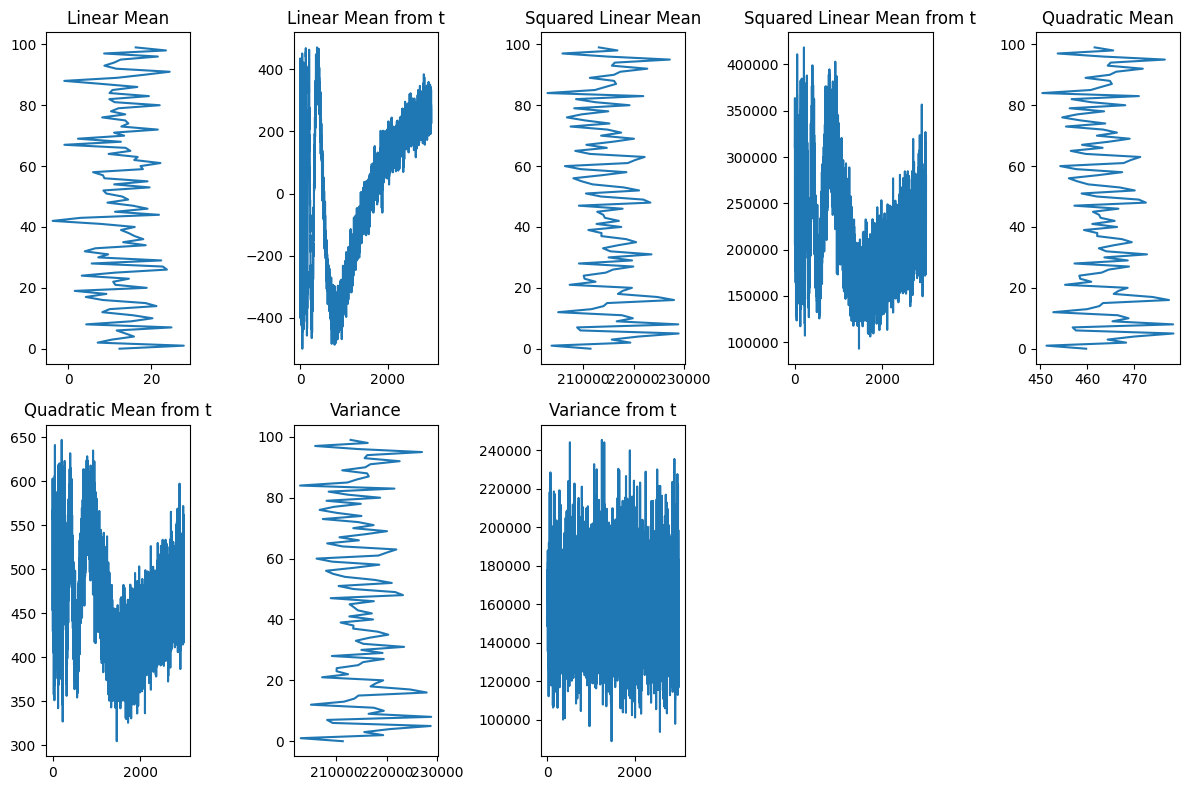

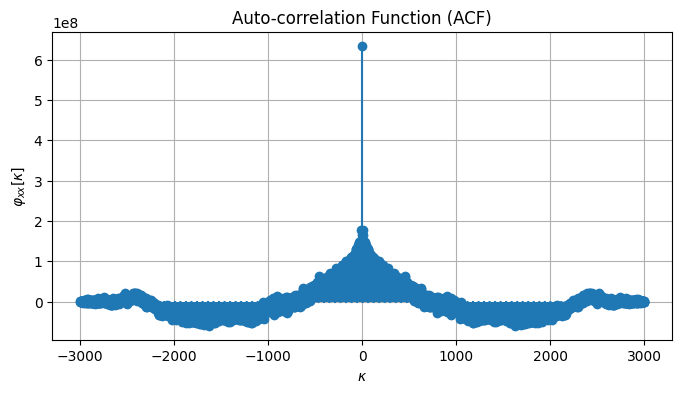

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
from scipy import signal
from scipy import stats

def my_xcorr(x, y):
    N, M = len(x), len(y)
    kappa = np.arange(N+M-1) - (M-1)
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

# Set seed for reproducible results
seed = 1234
stats.norm.random_state = Generator(PCG64(seed))

# Parameters
F = 400
A = 400.25
B = 399.75
Nt  = 3000
Ns = 100


s = np.arange(Ns)  # ensemble index (s to indicate sample function)
t = np.arange(Nt)  # time index

# Generate ensemble of random signals
signals = A * np.cos(2 * np.pi * F / np.arange(1, N+1)) + B * np.random.normal(size=(Ns, Nt))

# Task 1: Estimate the linear mean as ensemble average
linear_mean = np.mean(signals, axis=1)

# Task 2: Estimate the linear mean and squared linear mean
linear_mean_squared = np.mean(signals**2, axis=1)

# Task 3: Estimate the quadratic mean and variance
quadratic_mean = np.sqrt(np.mean(signals**2, axis=1))
variance = np.var(signals, axis=1)

# Task 4: Plot 1-4 graphically
plt.figure(figsize=(12, 8))

plt.subplot(2, 5, 1)
plt.plot(linear_mean,s)
plt.title('Linear Mean')

plt.subplot(2, 5, 2)
plt.plot(t,np.mean(signals, axis=0))
plt.title('Linear Mean from t')

plt.subplot(2, 5, 3)
plt.plot(linear_mean_squared,s)
plt.title('Squared Linear Mean')

plt.subplot(2, 5, 4)
plt.plot(t,np.mean(signals**2, axis=0))
plt.title('Squared Linear Mean from t')

plt.subplot(2, 5, 5)
plt.plot(quadratic_mean,s)
plt.title('Quadratic Mean')

plt.subplot(2, 5, 6)
plt.plot(t,np.sqrt(np.mean(signals**2, axis=0)))
plt.title('Quadratic Mean from t')

plt.subplot(2, 5, 7)
plt.plot(variance,s)
plt.title('Variance')

plt.subplot(2, 5, 8)
plt.plot(t,np.var(signals, axis=0))
plt.title('Variance from t')

plt.tight_layout()

# Task 5: Estimate and plot the auto-correlation function (ACF)
acf_kappa, acf_values = my_xcorr(signals[0, :], signals[0, :])
plt.figure(figsize=(8, 4))
plt.stem(acf_kappa, acf_values, basefmt='C0:', use_line_collection=True)
plt.xlabel(r'$\kappa$')
plt.ylabel(r'$\varphi_{xx}[\kappa]$')
plt.title('Auto-correlation Function (ACF)')
plt.grid(True)
plt.show()
